In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt
import numpy as np

# A. Image 0: coins.png

In [2]:
# Image 1: coins.png
img = cv2.imread("coins.png")

In [3]:
img.shape

(246, 300, 3)

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

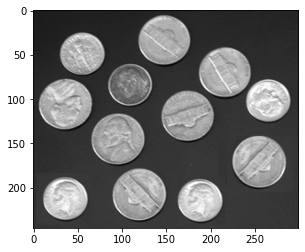

In [5]:
_ = plt.imshow(gray_img, cmap="gray")

126.0


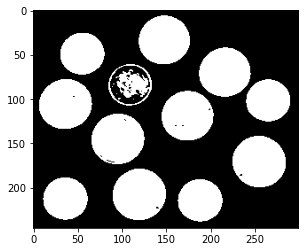

In [6]:
# Thresholding
ret0, th0 = cv2.threshold(gray_img, 0, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)
print(ret0)
_ = plt.imshow(th0, cmap='gray')

In [7]:
th0.shape

(246, 300)

## a. Flood fill

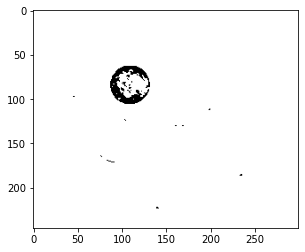

In [8]:
img_fill = th0.copy()
h, w = img_fill.shape
msk = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(img_fill, msk, (0, 0), 255)
_ = plt.imshow(img_fill, cmap="gray")

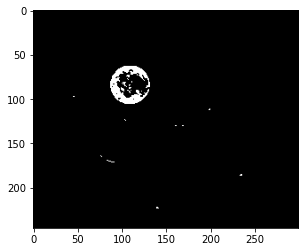

In [9]:
img_fill_invert = ~img_fill
_ = plt.imshow(img_fill_invert, cmap="gray")

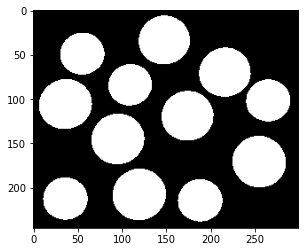

In [10]:
img_out = img_fill_invert | th0
_ = plt.imshow(img_out, cmap="gray")

In [11]:
contours, _ = cv2.findContours(img_out, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours: ", len(contours))

Number of contours:  12


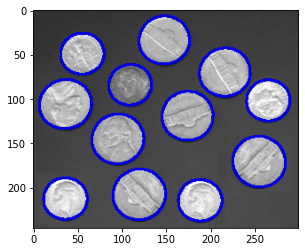

In [12]:
result = img.copy()
cv2.drawContours(result, contours, -1, (225,0,0), 2)
_ = plt.imshow(cv2.cvtColor(result, cv2.COLOR_RGB2BGR))

## b. Dilating and eroding

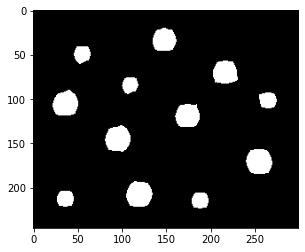

In [13]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize=(5, 5))
dilated_img = cv2.dilate(th0, SE,iterations = 3)
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize=(7, 7))
eroded_img = cv2.erode(dilated_img, SE,iterations = 7)
_ = plt.imshow(eroded_img, cmap="gray")

In [14]:
contours, _ = cv2.findContours(eroded_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours: ", len(contours))

Number of contours:  12


## c. Watershed

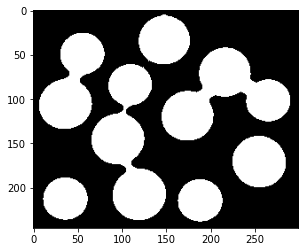

In [15]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize=(7, 7))
opening = cv2.morphologyEx(th0,cv2.MORPH_CLOSE,SE,iterations = 2)
_ = plt.imshow(opening, cmap="gray")

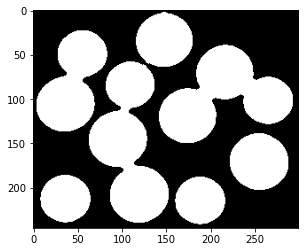

In [16]:
# sure background area
sure_bg = cv2.dilate(opening,SE,iterations=1)
_ = plt.imshow(sure_bg, cmap="gray")

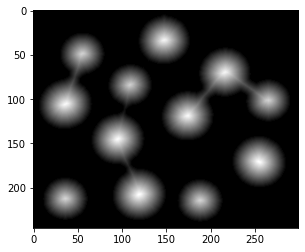

In [17]:
# Finding distance transform
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
_ = plt.imshow(dist_transform, cmap="gray")

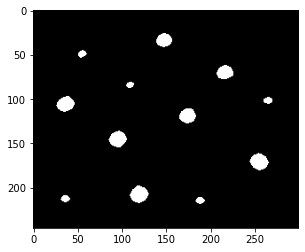

In [18]:
# Finding sure foreground area
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
_ = plt.imshow(sure_fg, cmap="gray")

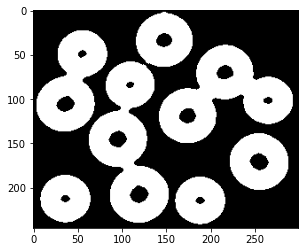

In [19]:
# border
border = cv2.subtract(sure_bg,sure_fg)
_ = plt.imshow(border, cmap="gray")

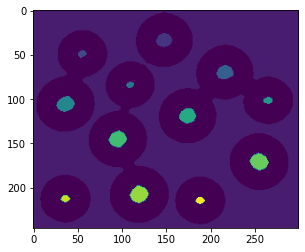

In [20]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[border==255] = 0
_ = plt.imshow(markers)

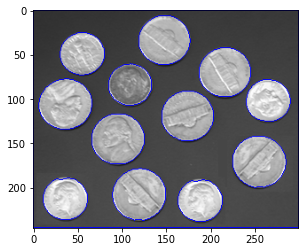

In [21]:
result = img.copy()
markers = cv2.watershed(img,markers)
result[markers == -1] = [0,0,255]
_ = plt.imshow(result)

# B. Image 1: coins_01.png

(348, 500, 3)

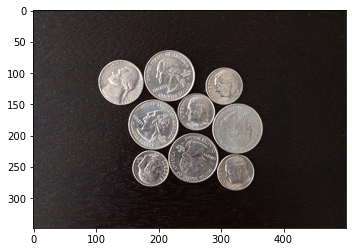

In [22]:
img1 = cv2.imread("coins_01.png")
_ = plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
img1.shape

In [23]:
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img1.shape

(348, 500)

93.0


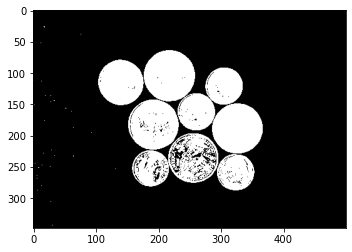

In [24]:
# Thresholding
ret1, th1 = cv2.threshold(gray_img1, 0, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)
print(ret1)
_ = plt.imshow(th1, cmap='gray')

In [25]:
def fullFill(thresh):
    img_fill = thresh.copy()
    h, w = img_fill.shape
    msk = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(img_fill, msk, (0, 0), 255)
    img_fill_invert = ~img_fill
    img_out = img_fill_invert | thresh
    plt.imshow(img_out, cmap="gray")
    return img_out

In [26]:
def numberContours(img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    print("Number of contours: ", len(contours))
    return contours

In [27]:
def drawContours(img, contours):
    result = img.copy()
    cv2.drawContours(result, contours, -1, (225,0,0), 2)
    _ = plt.imshow(cv2.cvtColor(result, cv2.COLOR_RGB2BGR))

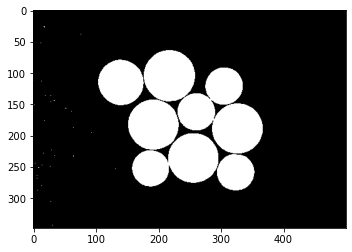

In [28]:
img1_fill = fullFill(th1)

In [29]:
contours = numberContours(img1_fill) # this is a wrong answer

Number of contours:  36


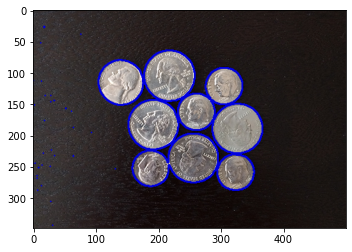

In [30]:
drawContours(img1, contours) # this is a wrong answer

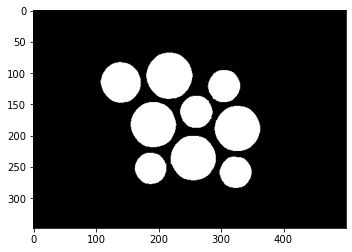

In [31]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize= (5,5))
eroded_img1 = cv2.erode(img1_fill, SE,iterations = 2)
_ = plt.imshow(eroded_img1, cmap="gray")

In [32]:
contours = numberContours(eroded_img1)

Number of contours:  9


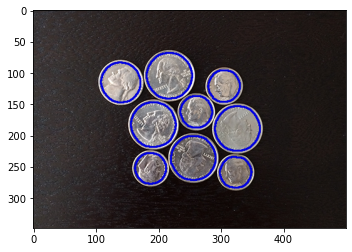

In [33]:
drawContours(img1, contours)

# C. Image 2: coins_02.png

(383, 500, 3)

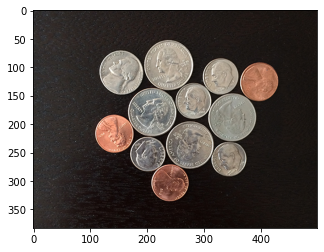

In [34]:
img2 = cv2.imread("coins_02.png")
_ = plt.imshow(cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))
img2.shape

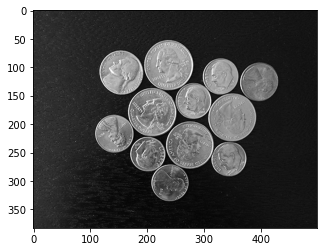

In [35]:
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
_ = plt.imshow(gray_img2, cmap="gray")

87.0


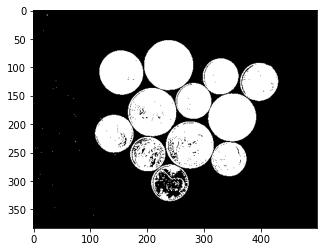

In [36]:
# Thresholding
ret2, th2 = cv2.threshold(gray_img2, 0, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)
print(ret2)
_ = plt.imshow(th2, cmap='gray')

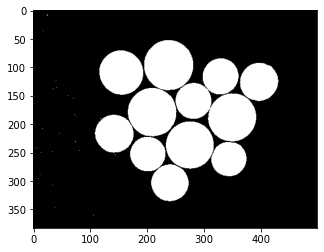

In [37]:
img2_fill = fullFill(th2)

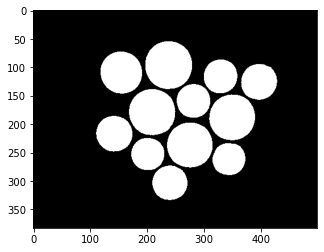

In [38]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize= (3,3))
eroded_img2 = cv2.erode(img2_fill, SE,iterations = 2)
_ = plt.imshow(eroded_img2, cmap="gray")

In [39]:
contours = numberContours(eroded_img2)

Number of contours:  12


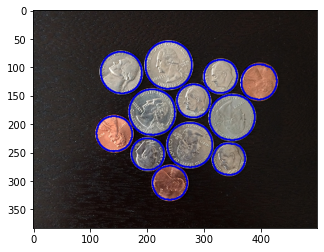

In [40]:
drawContours(img2, contours)

# D. Image: coins_03.png

(569, 500, 3)

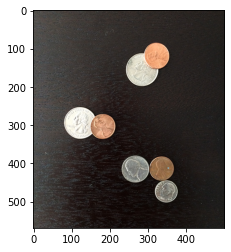

In [41]:
img3 = cv2.imread("coins_03.png")
_ = plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
img3.shape

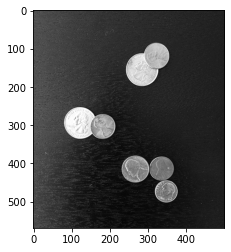

In [42]:
gray_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
_ = plt.imshow(gray_img3, cmap='gray')

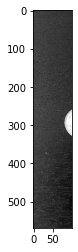

In [43]:
segment = gray_img3[:, :100].copy()
_ = plt.imshow(segment, cmap='gray')

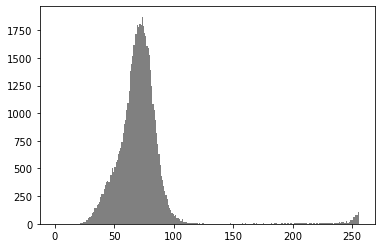

In [44]:
_ = plt.hist(segment.ravel(), 256, [0, 256], color='gray')
plt.show()

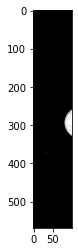

In [45]:
segment[segment < 150] = 0
_ = plt.imshow(segment, cmap='gray')

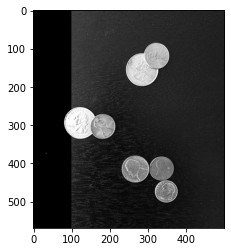

In [46]:
gray_img3[:, :100] = segment
_ = plt.imshow(gray_img3, cmap='gray')

103.0


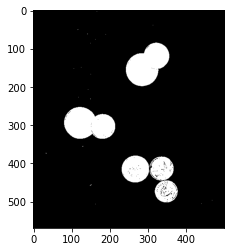

In [47]:
# Thresholding
ret3, th3 = cv2.threshold(gray_img3, 0, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)
print(ret3)
_ = plt.imshow(th3, cmap='gray')

In [48]:
contours = numberContours(th3)

Number of contours:  24


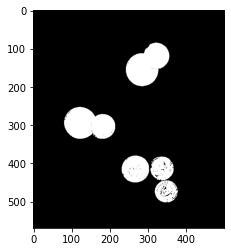

In [49]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize=(3, 3))
opening3 = cv2.morphologyEx(th3,cv2.MORPH_OPEN,SE,iterations = 1)
_ = plt.imshow(opening3, cmap="gray")

## a. Flood fill

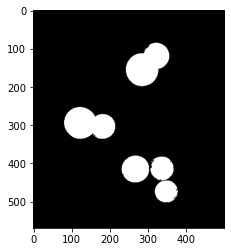

In [50]:
img3_fill = fullFill(opening3)

In [51]:
contours = numberContours(th3)

Number of contours:  24


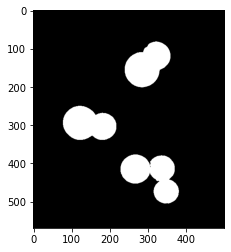

In [52]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize= (7,7))
dilated_img3 = cv2.dilate(img3_fill, SE,iterations = 1)
_ = plt.imshow(dilated_img3, cmap="gray")

In [53]:
contours = numberContours(dilated_img3)

Number of contours:  3


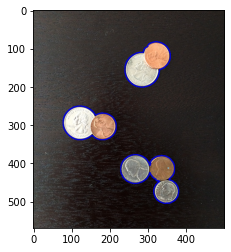

In [54]:
drawContours(img3, contours)

# E. Image: water_coins

(312, 252, 3)

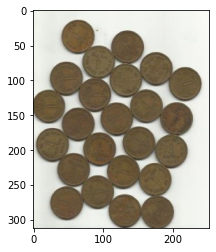

In [55]:
waterCoin = cv2.imread("water_coins.jpg")
_ = plt.imshow(cv2.cvtColor(waterCoin, cv2.COLOR_RGB2BGR))
waterCoin.shape

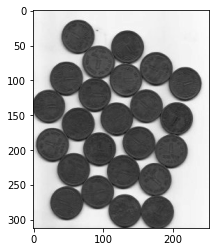

In [56]:
waterCoin_gray = cv2.cvtColor(waterCoin, cv2.COLOR_RGB2GRAY)
_ = plt.imshow(waterCoin_gray, cmap="gray")

157.0


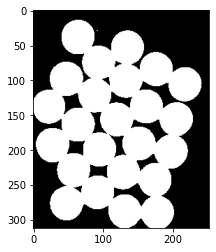

In [57]:
ret5, th5 = cv2.threshold(waterCoin_gray,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
print(ret5)
_ = plt.imshow(th5, cmap="gray")

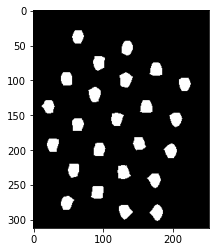

In [58]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize= (7,7))
erode_water = cv2.erode(th5, SE, iterations=5)
_ = plt.imshow(erode_water, cmap="gray")

In [59]:
_ = numberContours(erode_water)

Number of contours:  24


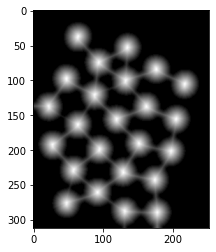

In [65]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize=(7, 7))
opening = cv2.morphologyEx(th5,cv2.MORPH_OPEN,SE, iterations = 2)
eroded_img5 = cv2.erode(opening, SE,iterations = 1)
# Sure background area
sure_bg = cv2.dilate(eroded_img5,SE,iterations=1)
_ = plt.imshow(sure_bg, cmap="gray")
# Finding distance transform
dist_transform = cv2.distanceTransform(eroded_img5,cv2.DIST_L2,5)
_ = plt.imshow(dist_transform, cmap="gray")

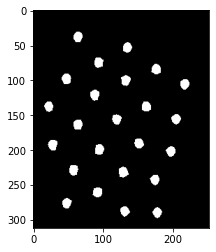

In [66]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
_ = plt.imshow(sure_fg, cmap="gray")

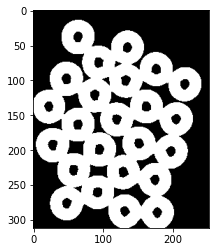

In [67]:
border = cv2.subtract(sure_bg,sure_fg)
_ = plt.imshow(border, cmap="gray")

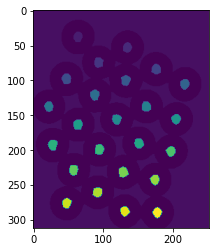

In [68]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[border==255] = 0
_ = plt.imshow(markers)

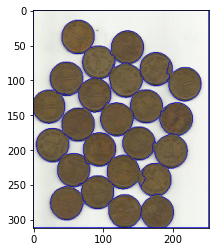

In [69]:
result = waterCoin.copy()
markers = cv2.watershed(waterCoin,markers)
result[markers == -1] = [225,0,0]
_ = plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))